In [30]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

def getYear(date):
    return date.split("-")[0]

In [23]:
# Load initial data into df
df = pd.read_csv("../data/abstracts_chunk_1.csv",quoting=csv.QUOTE_ALL) 
# Display settings
pd.set_option('display.max_columns', 999)
# Drop rows with nan abstracts
df = df.dropna(subset=['abstracts-retrieval-response.coredata.dc:description.abstract.ce:para'])

/Users/neerajmac/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (81,87,91,92) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
# Extract dates
dates = df.loc[:, ["abstracts-retrieval-response.coredata.prism:coverDate"]]

In [33]:
# Gets year
dates['year'] = dates['abstracts-retrieval-response.coredata.prism:coverDate'].apply(lambda date: getYear(date))

,abstracts-retrieval-response.coredata.prism:coverDate,year
4478,1963-01-01,1963
4480,1963-01-01,1963
4479,1963-01-01,1963
4477,1963-01-01,1963
4476,1963-01-01,1963
...,...,...
6832,2014-01-30,2014
6833,2014-01-30,2014
6834,2014-01-30,2014
6820,2014-01-30,2014


In [44]:
abstracts_per_year = dates['year'].value_counts().sort_index()

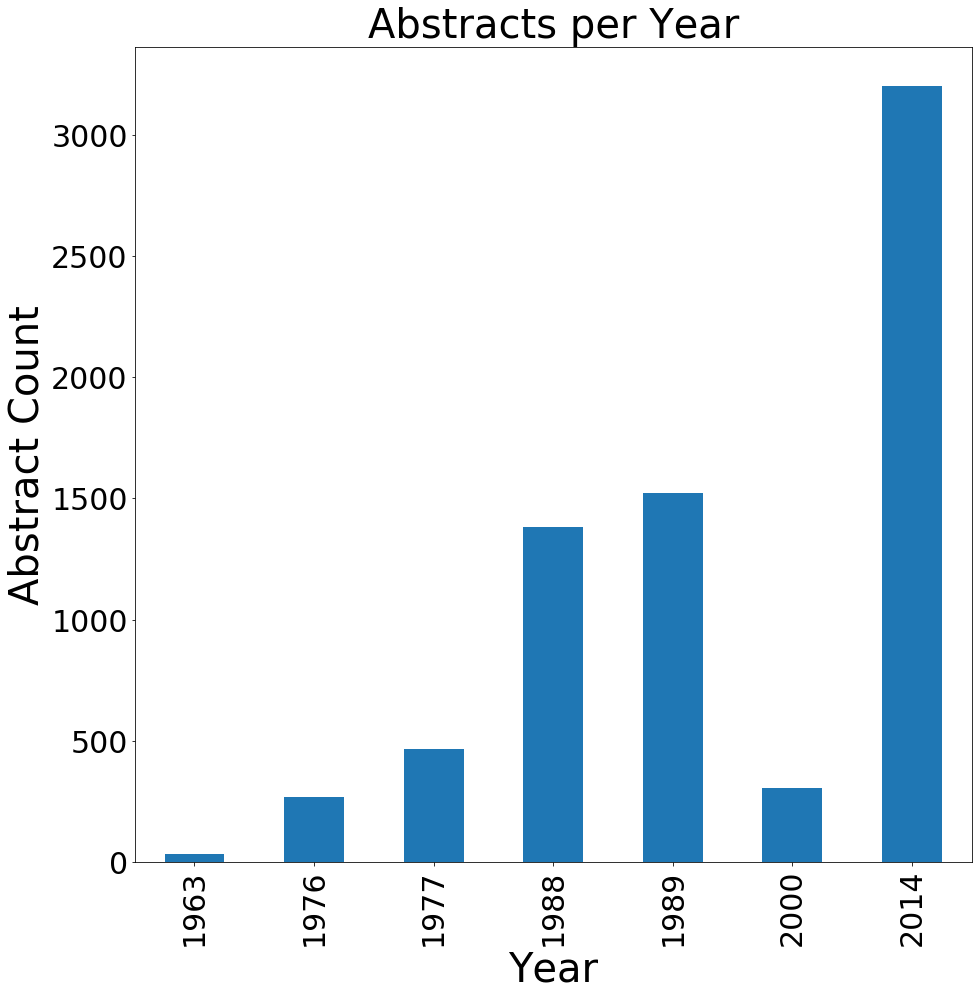

In [45]:
# Params for the notebook
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': '40',
         'axes.titlesize':'40',
         'xtick.labelsize':'30',
         'ytick.labelsize':'30'}

pylab.rcParams.update(params)
fig = plt.figure(figsize = (15, 15)) 

# Plot creation
abstracts_per_year.plot(kind="bar")

# Plot labels
plt.xlabel("Year")
plt.ylabel("Abstract Count")
plt.title("Abstracts per Year")

# Plot specifications
plt.xticks(rotation=90)

# Abstract plot
plt.savefig("abstracts-per-year.png")
plt.show()

# Exports in csv and xlsx
abstracts_per_year.reset_index().to_csv('dates.csv')
abstracts_per_year.reset_index().to_excel('dates.xlsx')